## Import Clustering Libs and Read-Processed-Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import davies_bouldin_score,silhouette_score, calinski_harabasz_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv("../data/preprocessed_data.csv")

In [3]:
data.columns

Index(['Category', 'PdDistrict', 'X', 'Y', 'Hour', 'Month', 'day',
       'count_days'],
      dtype='object')

In [4]:
sampled_data, _ = train_test_split( data , train_size=25000,stratify=data['Category'] ,random_state=42)

X = sampled_data.drop(columns=['Category'])
y = sampled_data['Category']

## Can't Use Grid Search

#### So We Tried To Search with "For LOOP" !!

In [6]:
kmedoids_range = range(2, 15)
silhouette_scores = []          #For Score Calculations

for k in kmedoids_range:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(X)
    score = silhouette_score(X, kmedoids.labels_)
    silhouette_scores.append(score)
    
best_k = kmedoids_range[silhouette_scores.index(max(silhouette_scores))]  

In [7]:
best_k

3

#### best_k For clustering is 3 !!!

## Now , lets add "Clusters"-Cols to Our Training Data

In [8]:
kmedoids = KMedoids(n_clusters=best_k, random_state=42).fit(X)

clustered_Data = X.copy()
clustered_Data['Clusters'] = kmedoids.labels_

not_Clustered_Data = clustered_Data.drop(columns=['Clusters'])

In [9]:
sil_score_clustered_Data = silhouette_score(not_Clustered_Data, kmedoids.labels_)
calinski_score_clustered_Data = calinski_harabasz_score(not_Clustered_Data, kmedoids.labels_)
davies_score_clustered_Data = davies_bouldin_score(not_Clustered_Data, kmedoids.labels_)

print("silhouette:", sil_score_clustered_Data)
print("calinski_harabasz:", calinski_score_clustered_Data)
print("davies_bouldin:", davies_score_clustered_Data)

#silhouette_score: 0.239232248909592
#calinski_harabasz_score: 10546.715021629485
#davies_bouldin_score: 2.272673468023631

silhouette: 0.23923224890959097
calinski_harabasz: 10546.71502162948
davies_bouldin: 2.2726734680236276


In [10]:
clustered_Data

,PdDistrict,X,Y,Hour,Month,day,count_days,Clusters
622312,5,-0.871797,-0.055218,0.241546,1.331962,-0.066074,-0.918547,0
63599,4,-0.266478,1.280572,0.394109,-0.126598,-0.179966,1.447257,0
32716,0,1.905681,-1.337436,-0.368703,1.331962,0.958949,1.570342,0
81367,5,-1.939273,0.011803,0.546671,-1.001734,-0.749423,1.374010,0
391924,7,1.152978,0.220264,-2.046887,-0.126598,-0.863315,0.063870,1
...,...,...,...,...,...,...,...,...
781040,8,-2.791432,-0.091753,-0.978952,-0.126598,1.414515,-1.576260,1
788517,7,0.895060,0.673499,-0.216140,-0.418310,0.275600,-1.607220,2
219333,7,0.225471,0.165877,1.309482,-1.001734,-0.749423,0.822769,2
217473,3,-0.449263,0.022564,-1.894325,-1.001734,0.731166,0.832586,0


# PCA

#### The dataset has high dimensionality; we will apply PCA to reduce the number of features while retaining as much variance as possible.

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Apply PCA (Principal Component Analysis) to reduce data to 3D
pca = PCA(n_components=3) # choose 3D
reduced_data_3d = pca.fit_transform(X) # Transform the original data (X) to 3D

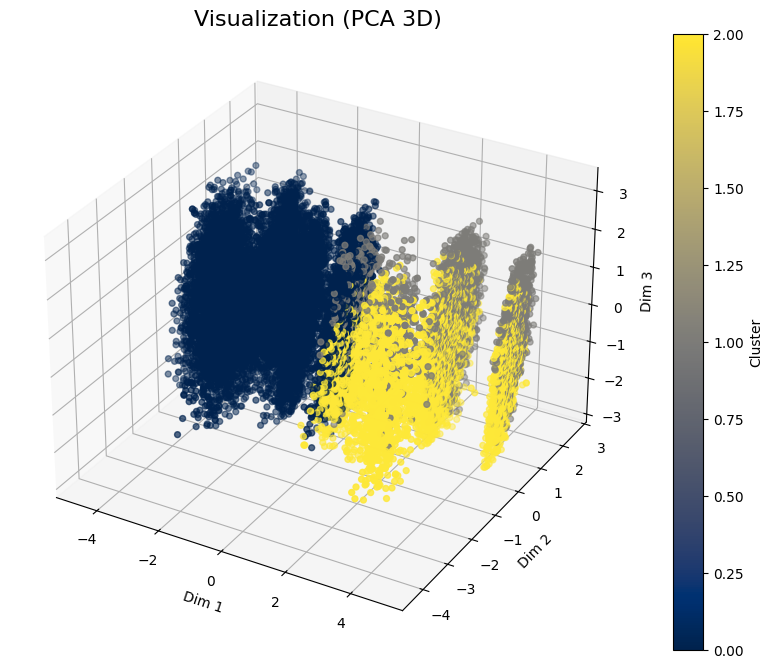

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_data_3d[:, 0], reduced_data_3d[:, 1], reduced_data_3d[:, 2],
                c=kmedoids.labels_, cmap='cividis', s=18)

ax.set_title("Visualization (PCA 3D)", fontsize=16)
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_zlabel("Dim 3")

plt.colorbar(sc, label='Cluster')
plt.show()

# Hierarchical

### Using Hierarchical Clustering to uncover nested clusters and explore the data's structure at various levels.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  

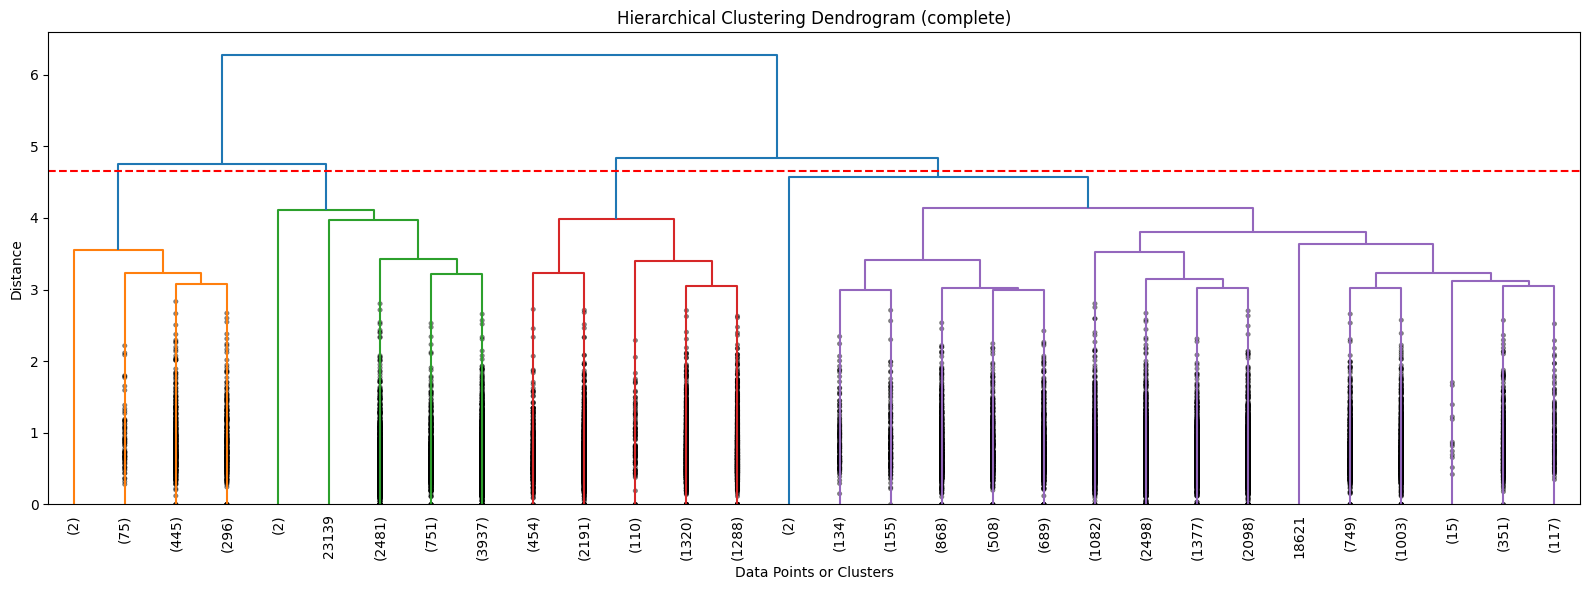

In [17]:
plt.figure(figsize=(16, 6))
linked=linkage(X,metric='euclidean', method='average')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.axhline(y=4.65, color='red', linestyle='--') 
plt.title("Hierarchical Clustering Dendrogram (complete)")
plt.xlabel("Data Points or Clusters")
plt.ylabel("Distance")
plt.tight_layout()
plt.savefig('hierarchical_dendrogram_cut.png')
plt.show()

In [18]:
Hierar_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='average')
Hierar_labels = Hierar_model.fit_predict(X)
hierar_Data=X.copy()
hierar_Data['Hierarchical_Cluster'] = Hierar_labels
hierar_Data.head()

,PdDistrict,X,Y,Hour,Month,day,count_days,Hierarchical_Cluster
622312,5,-0.871797,-0.055218,0.241546,1.331962,-0.066074,-0.918547,1
63599,4,-0.266478,1.280572,0.394109,-0.126598,-0.179966,1.447257,1
32716,0,1.905681,-1.337436,-0.368703,1.331962,0.958949,1.570342,0
81367,5,-1.939273,0.011803,0.546671,-1.001734,-0.749423,1.374010,1
391924,7,1.152978,0.220264,-2.046887,-0.126598,-0.863315,0.063870,2


In [19]:
No_hierar_Data = hierar_Data.drop(columns=['Hierarchical_Cluster'])

sil_score_hierar_Data = silhouette_score(No_hierar_Data, Hierar_labels)
calinski_score_hierar_Data = calinski_harabasz_score(No_hierar_Data, Hierar_labels)
davies_score_hierar_Data = davies_bouldin_score(No_hierar_Data, Hierar_labels)

print("silhouette:", sil_score_hierar_Data)
print("calinski_harabasz:", calinski_score_hierar_Data)
print("davies_bouldin:", davies_score_hierar_Data)

silhouette: 0.19457079219017495
calinski_harabasz: 6334.564726658944
davies_bouldin: 1.3180004238816498


In [20]:
results = {
    "Metric": ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"],
    "KMedoids": [sil_score_clustered_Data, calinski_score_clustered_Data, davies_score_clustered_Data],
    "Hierarchical": [sil_score_hierar_Data, calinski_score_hierar_Data, davies_score_hierar_Data]
}

compare_df = pd.DataFrame(results)
compare_df

,Metric,KMedoids,Hierarchical
0,Silhouette Score,0.239232,0.194571
1,Calinski-Harabasz Index,10546.715022,6334.564727
2,Davies-Bouldin Index,2.272673,1.318000


## Results

### Based on the analysis, it can be concluded that KMedoids has a more significant impact on our decision-making process.


## Save clustered_Data File

In [21]:
clustered_Data.columns

Index(['PdDistrict', 'X', 'Y', 'Hour', 'Month', 'day', 'count_days',
       'Clusters'],
      dtype='object')

In [22]:
clustered_Data.to_csv("../data/clustered_Data.csv")

In [23]:
clustered_Data.columns

Index(['PdDistrict', 'X', 'Y', 'Hour', 'Month', 'day', 'count_days',
       'Clusters'],
      dtype='object')